# LLM Workshop

Welcome to this LLM Workshop! We will be learning about using LLMs in practice, but first, we must cover some related topics such as embeddings, APIs and LLM basics. Lets import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import spacy
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
import re

/Users/olinewcombe/Documents/GitHub/LLMWorkshop/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


You only need to run the following command once:

In [ ]:
# !python -m spacy download en_core_web_lg

## Embeddings

Uses https://www.kaggle.com/datasets/shaharz/twitts-of-trump-and-obama

In [39]:
# df = pd.read_csv('data/tweets/tweets.csv', errors_bad_lines=False, encoding='utf-8')
with open('data/tweets/tweets.csv', 'r', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f, index_col=0)

In [40]:
df

,data_tweets,data_labels
0,Michelle and I are delighted to congratulate P...,1.0
1,"From the Obama family to yours, we wish you a ...",1.0
2,"ME: Joe, about halfway through the speech, Im...",1.0
3,"RT @ObamaFoundation: Today, we honor those who...",1.0
4,This is what happens when the people vote. Con...,1.0
...,...,...
395,Thanks to @SenateMajLdr McConnell and the @Sen...,0.0
396,"Thank you to the GREAT NYPD, First Responders ...",0.0
397,@NYGovCuomo @NYCMayor ...fully supports any an...,0.0
398,Just spoke with @NYGovCuomo and @NYCMayor de B...,0.0


# Embeddings

In [3]:
nlp = spacy.load("en_core_web_lg")

In [50]:
doc = nlp("dog cat banana apple")

similarities = np.zeros((4, 4))

for i, token1 in enumerate(doc):
    for j, token2 in enumerate(doc):
        similarities[i, j] = token1.similarity(
            token2
        )  # computes the cosine similarity

pd.DataFrame(
    similarities,
    index=["Dog", "Cat", "Banana", "Apple"],
    columns=["Dog", "Cat", "Banana", "Apple"],
)

,Dog,Cat,Banana,Apple
Dog,1.000000,0.822082,0.209090,0.228810
Cat,0.822082,1.000000,0.223588,0.203681
Banana,0.209090,0.223588,1.000000,0.664670
Apple,0.228810,0.203681,0.664670,1.000000


In [10]:
init_notebook_mode(connected=True)


def scatter(x, y, labels, text):
    data = [
        go.Scatter(
            x=x[labels == label],
            y=y[labels == label],
            mode="markers",
            opacity=0.7,
            text=text[labels == label],
            name=label,
            marker={"size": 15, "line": {"width": 0.5, "color": "white"}},
        )
        for label in set(labels)
    ]
    layout = go.Layout(
        xaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
        yaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
        hovermode="closest",
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, config={"displayModeBar": False})

In [29]:
words = ["cat", "meow", "dog", "woof", "bird", "tweet", "lion", "roar", "horse", "neigh", ]

pca = PCA()

glove_vectors = np.concatenate(
    [nlp(word).vector.reshape(1, 300) for word in words]
)

glove_pca = pca.fit_transform(glove_vectors)

In [34]:
glove_vectors.shape

(10, 300)

What we see in this 2-dimensional repersentation, is that some level of meaning is preserved - words that are used in similar contexts are closer together.

In [31]:
scatter(glove_pca[:, 0], glove_pca[:, 1], np.array(words), np.array(words))

## Exercises
1) Think about why these relationships aren't exact (here it isn't exactly king - man + woman = queen). I can think of two main ones. For one - why may tweet be a bit of an outlier here?
2) Play around yourself and find some relationships - really try and think about whats going on here - what are the dimensions each representing? 

### Answers
1) a) these words are used in other contexts, not just the one we are using to compare here. Things like 'hey man' for example, could skew the clean interpretation we may have otherwise. 

    b) This is a two dimensional representation of these 100 dimensional representations, plenty of detail will be lost here.

In [109]:
df = pd.read_csv('data/IMDB/MovieReviewTrainingDatabase.csv')

In [110]:
df

,sentiment,review
0,Positive,With all this stuff going down at the moment w...
1,Positive,'The Classic War of the Worlds' by Timothy Hin...
2,Negative,The film starts with a manager (Nicholas Bell)...
3,Negative,It must be assumed that those who praised this...
4,Positive,Superbly trashy and wondrously unpretentious 8...
...,...,...
24995,Negative,It seems like more consideration has gone into...
24996,Negative,I don't believe they made this film. Completel...
24997,Negative,"Guy is a loser. Can't get girls, needs to buil..."
24998,Negative,This 30 minute documentary Buñuel made in the ...


In [21]:
df = pd.read_csv('data/IMDB/IMDBDataset.csv')

In [25]:
imdb_df = df[::100].reset_index(drop=True)
imdb_df['sentiment'] = imdb_df['sentiment'].map({'positive': 1, 'negative': 0})
imdb_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,This short film that inspired the soon-to-be f...,1
2,Interesting and short television movie describ...,0
3,"""Mararía"" really disappointed me. I can't cons...",0
4,What can you say about the film White Fire. Am...,1
...,...,...
495,This is a case of a bunch of people thinking t...,0
496,As a long-time fan of Studio Ghibli and especi...,1
497,"Okay, I'll admit the casting in the film is RE...",1
498,"In the opening scene of ""Malta Story"" Mr A.Gui...",0


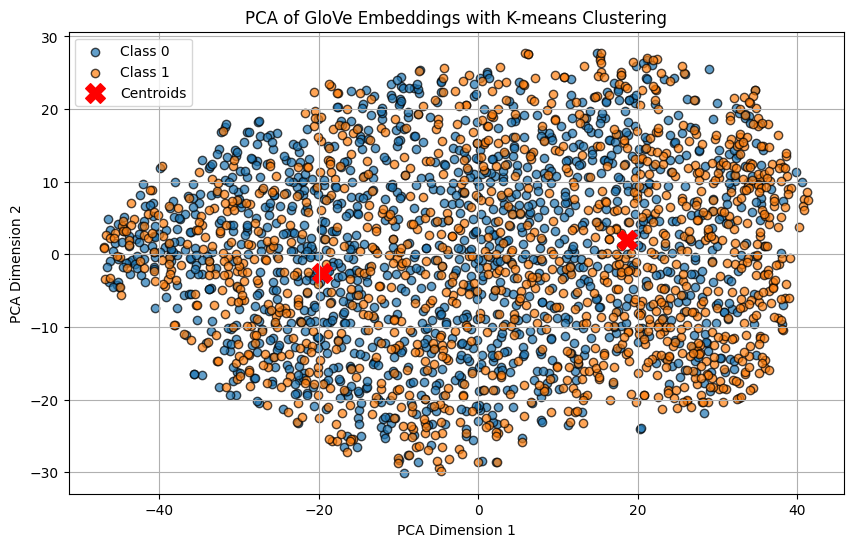

In [125]:
def get_embedding(text):
    doc = nlp(text)
    return doc.vector.reshape(1, 300)

# Apply embedding to each tweet
imdb_df['embedding'] = imdb_df['review'].apply(get_embedding)

# Stack embeddings into a 2D numpy array
X = np.vstack(imdb_df['embedding'].values)

# Dimensionality reduction with PCA
tsne = TSNE(n_components=2)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
# clusters = kmeans.fit_predict(X_pca)
clusters = kmeans.fit_predict(X_tsne)

# Plotting
plt.figure(figsize=(10, 6))
for label in [0, 1]:
    idx = imdb_df['sentiment'] == label
    plt.scatter(
        X_tsne[idx, 0], X_tsne[idx, 1],
        label=f"Class {label}",
        alpha=0.7, edgecolor='k'
    )

# Add predicted clusters
# plt.scatter(
#     X_tsne[:, 0], X_tsne[:, 1],
#     c=clusters, cmap='viridis', alpha=0.3, label="Predicted Clusters"
# )

# Add k-means cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    color='red', marker='X', s=200, label="Centroids"
)
plt.title("PCA of GloVe Embeddings with K-means Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

In [118]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_tsne, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.523048460483551


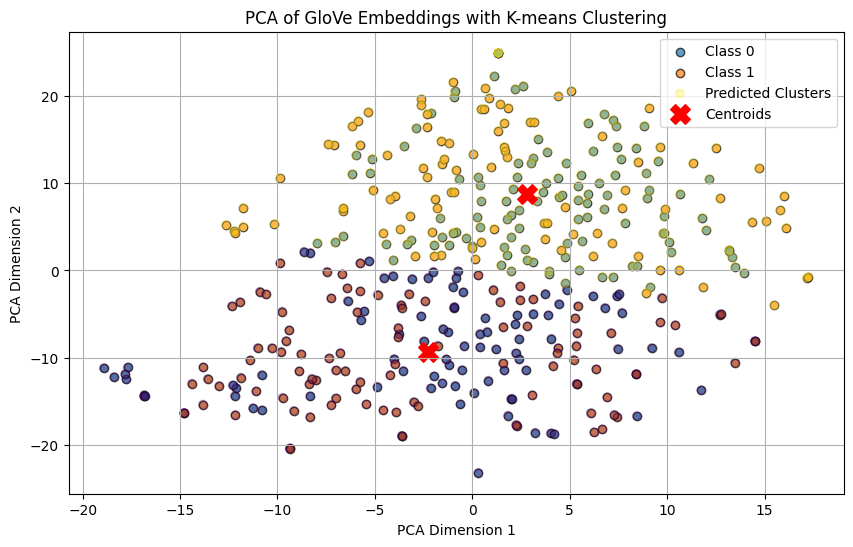

In [49]:
def get_embedding(text):
    doc = nlp(text)
    return doc.vector

# Apply embedding to each tweet
df['embedding'] = df['data_tweets'].apply(get_embedding)

# Stack embeddings into a 2D numpy array
X = np.vstack(df['embedding'].values)

# Dimensionality reduction with PCA
tsne = TSNE(n_components=2)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)
X_tsne = tsne.fit_transform(X)


# K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
# clusters = kmeans.fit_predict(X_pca)
clusters = kmeans.fit_predict(X_tsne)

# Plotting
plt.figure(figsize=(10, 6))
for label in [0, 1]:
    idx = df['data_labels'] == label
    plt.scatter(
        X_tsne[idx, 0], X_tsne[idx, 1],
        label=f"Class {label}",
        alpha=0.7, edgecolor='k'
    )

# Add predicted clusters
plt.scatter(
    X_tsne[:, 0], X_tsne[:, 1],
    c=clusters, cmap='viridis', alpha=0.3, label="Predicted Clusters"
)

# Add k-means cluster centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    color='red', marker='X', s=200, label="Centroids"
)
plt.title("PCA of GloVe Embeddings with K-means Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

In [122]:
# import plotly.graph_objs as go
# from plotly.offline import iplot
# from plotly.offline import init_notebook_mode

# Initialize Plotly for Jupyter Notebooks (if you're working in a notebook)
init_notebook_mode(connected=True)

def truncate_text(text, max_length=100):
    """Function to truncate text to a maximum length with ellipsis."""
    return text.apply(lambda x: x[:max_length] + '...' if len(x) > max_length else x)

def scatter(x, y, labels, text):
    
    data = [
        go.Scatter(
            x=x[labels == label],
            y=y[labels == label],
            mode="markers",
            opacity=0.7,
            text=text[labels == label],
            name=f"Cluster {label}",
            marker={"size": 15, "line": {"width": 0.5, "color": "white"}},
            hoverlabel={"font": {"size": 10}}
        )
        for label in set(labels)
    ]
    
    layout = go.Layout(
        xaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
        yaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
        hovermode="closest",  # Hover mode set to "closest" to display the text on hover
    )
    
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, config={"displayModeBar": False})

# Assuming `X_pca` is the 2D PCA-transformed data and `clusters` are the cluster labels
# Also assuming `df['review']` contains the review texts for hover text
truncated_text = truncate_text(imdb_df['review'], max_length=100)
scatter(X_tsne[:, 0], X_tsne[:, 1], clusters, truncated_text)

In [95]:
truncate_text(imdb_df['review'], max_length=100)

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The..."

In [91]:
imdb_df['review']

0     One of the other reviewers has mentioned that ...
1     What an empty and lack lustre rendition of the...
2     This movie is awful, I can't even be bothered ...
3     Oh dear god. This was horrible. There is bad, ...
4     Stranded in Space (1972) MST3K version - a ver...
                            ...                        
95    The cover of the VHS says it all: "Without dou...
96    Ten out of ten stars is no exaggeration. This ...
97    The End Of Suburbia (TEOS) is a very useful fi...
98    I haven't laughed this hard at a movie in a lo...
99    This is a case of a bunch of people thinking t...
Name: review, Length: 100, dtype: object

In [88]:
truncated_text

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The...",
 'What an empty and lack lustre rendition of the classic novel. I do wish people would stop messing ab...',
 "This movie is awful, I can't even be bothered to write a review on this garbage! All i will say it i...",
 'Oh dear god. This was horrible. There is bad, then there was this. This movie makes no sense at all....',
 'Stranded in Space (1972) MST3K version - a very not good TV movie pilot, for a never to be made seri...',
 "But I can't say how I really feel about this pile of steaming dung. Where to begin. The film quality...",
 'I bought a set of 4 DVDs for 10 bucks at my local Suncoast, which contained this movie and three oth...',
 "Not only does the film's author, Steven Greenstreet, obviously idolize Michael Moore, but he also fo...",
 'This feels as if it is a Czech version of Pearl Harbor. It has a same story, both guys fall in love ...',
 'A movie theater with a bad

From google gemini tutorial https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/tutorials/clustering_with_embeddings.ipynb

In [144]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_train.data = [re.sub(r'[\w\.-]+@[\w\.-]+', '', d) for d in newsgroups_train.data] # Remove email
newsgroups_train.data = [re.sub(r"", "", d) for d in newsgroups_train.data] # Remove names
newsgroups_train.data = [d.replace("From: ", "") for d in newsgroups_train.data] # Remove "From: "
newsgroups_train.data = [d.replace("\nSubject: ", "") for d in newsgroups_train.data] # Remove "\nSubject: "
newsgroups_train.data = [d.replace("\n", " ") for d in newsgroups_train.data] # Remove "\nSubject: "

     
df_train = pd.DataFrame(newsgroups_train.data, columns=['Text'])
df_train['Label'] = newsgroups_train.target
# Match label to target name index
df_train['Class Name'] = df_train['Label'].map(newsgroups_train.target_names.__getitem__)
# Retain text samples that can be used in the gecko model.
df_train = df_train[df_train['Text'].str.len() < 10000]
df_train = df_train[df_train['Class Name'].str.contains('sci')]
SAMPLE_SIZE = 150
df_train = (df_train.groupby('Label', as_index = False)
                    .apply(lambda x: x.sample(SAMPLE_SIZE))
                    .reset_index(drop=True))

# Choose categories about science
df_train = df_train[df_train['Class Name'].str.contains('sci')]

# Reset the index
df_train = df_train.reset_index(drop=True)
df_train.drop(columns=['Label'], inplace=True)
df_train

,Text,Class Name
0,(Graham Toal)Re: Do we need the clipper for c...,sci.crypt
1,(Graham Toal)Let's build software cryptophone...,sci.crypt
2,"(technopagan priest)Re: Would ""clipper"" make ...",sci.crypt
3,"(Vesselin Bontchev)Re: Once tapped, your code...",sci.crypt
4,"(Phil G. Fraering)Re: Once tapped, your code ...",sci.crypt
...,...,...
595,(Pat)Re: Proton/Centaur? Organization: Expres...,sci.space
596,(Eric Van Drunen)Re: Big amateur rockets Nntp...,sci.space
597,(john baez)End of the Space Age Article-I.D.:...,sci.space
598,Cosmos 2238 Lines: 11 Nntp-Posting-Host: vax1....,sci.space


In [145]:
df_train.to_csv('data/newsposts/newsposts_science.csv')

In [36]:
df = pd.read_csv('data/newsposts/newsposts_science.csv', index_col=0)   

In [37]:
df

,Text,Class Name
0,(Graham Toal)Re: Do we need the clipper for c...,sci.crypt
1,(Graham Toal)Let's build software cryptophone...,sci.crypt
2,"(technopagan priest)Re: Would ""clipper"" make ...",sci.crypt
3,"(Vesselin Bontchev)Re: Once tapped, your code...",sci.crypt
4,"(Phil G. Fraering)Re: Once tapped, your code ...",sci.crypt
...,...,...
595,(Pat)Re: Proton/Centaur? Organization: Expres...,sci.space
596,(Eric Van Drunen)Re: Big amateur rockets Nntp...,sci.space
597,(john baez)End of the Space Age Article-I.D.:...,sci.space
598,Cosmos 2238 Lines: 11 Nntp-Posting-Host: vax1....,sci.space


In [4]:
def get_embedding_glove(text):
    doc = nlp(text)
    return doc.vector.reshape(1, 300)

nlp = spacy.load("en_core_web_lg")

In [38]:
def get_embedding(text):
    embeddings = model.encode(text)
    return embeddings.reshape(1, 384)

model = SentenceTransformer('all-MiniLM-L6-v2')

In [39]:
# tmp = get_embedding(['This is a test', 'this too'])
# tmp.shape

In [40]:
df['embedding'] = df['Text'].apply(get_embedding)

In [28]:
# imdb_df['embedding'] = imdb_df['review'].apply(get_embedding)

In [43]:
labels = df['Class Name'].astype('category').values.unique().tolist()
# labels = imdb_df['sentiment'].astype('category').values.unique().tolist()

labels

['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']

In [45]:
df

,Text,Class Name,embedding
0,(Graham Toal)Re: Do we need the clipper for c...,sci.crypt,"[[-0.06054436, 0.012341446, 0.009357697, -0.08..."
1,(Graham Toal)Let's build software cryptophone...,sci.crypt,"[[-0.16551456, -0.014644936, 0.0021515319, -0...."
2,"(technopagan priest)Re: Would ""clipper"" make ...",sci.crypt,"[[-0.088365346, 0.03238846, 0.031353846, 0.013..."
3,"(Vesselin Bontchev)Re: Once tapped, your code...",sci.crypt,"[[-0.07389585, 0.005995757, -0.05093089, -0.05..."
4,"(Phil G. Fraering)Re: Once tapped, your code ...",sci.crypt,"[[-0.06532623, -0.032926846, -0.02889922, -0.0..."
...,...,...,...
595,(Pat)Re: Proton/Centaur? Organization: Expres...,sci.space,"[[-0.025140392, 0.009846439, 0.01768717, -0.02..."
596,(Eric Van Drunen)Re: Big amateur rockets Nntp...,sci.space,"[[-0.006403808, -0.041306548, 0.03264999, -0.0..."
597,(john baez)End of the Space Age Article-I.D.:...,sci.space,"[[-0.032745365, -0.014511492, 0.1113805, 0.047..."
598,Cosmos 2238 Lines: 11 Nntp-Posting-Host: vax1....,sci.space,"[[0.02217039, -0.019322021, 0.050949458, -0.03..."


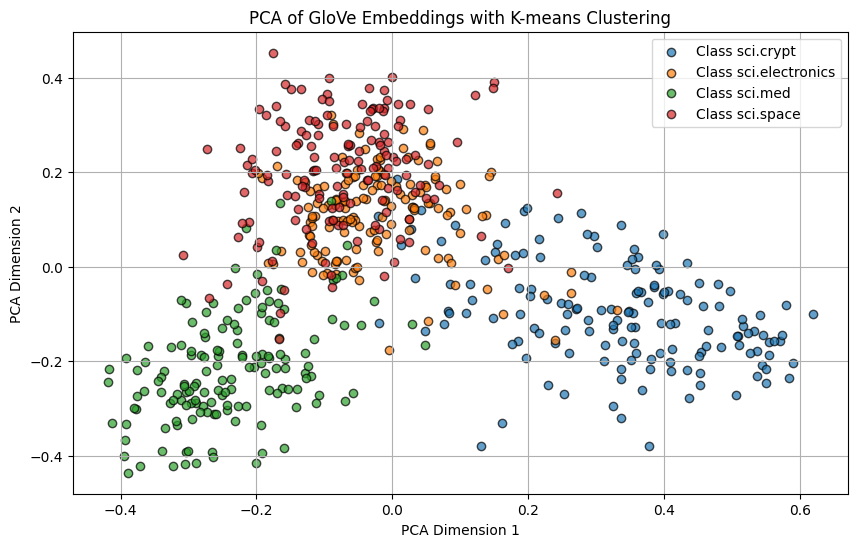

In [48]:
X = np.vstack(df['embedding'].values)

# Dimensionality reduction with PCA
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# K-means clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# # clusters = kmeans.fit_predict(X_pca)
# clusters = kmeans.fit_predict(X_tsne)

# Plotting
plt.figure(figsize=(10, 6))
for label in labels:
    idx = df['Class Name'] == label
    plt.scatter(
        X_pca[idx, 0], X_pca[idx, 1],
        label=f"Class {label}",
        alpha=0.7, edgecolor='k'
    )

# plt.scatter(
#     kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
#     color='red', marker='X', s=200, label="Centroids"
# )
plt.title("PCA of GloVe Embeddings with K-means Clustering")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
init_notebook_mode(connected=True)

def truncate_text(text, max_length=100):
    """Function to truncate text to a maximum length with ellipsis."""
    return text.apply(lambda x: x[:max_length] + '...' if len(x) > max_length else x)

def scatter(x, y, labels, text):
    
    data = [
        go.Scatter(
            x=x[labels == label],
            y=y[labels == label],
            mode="markers",
            opacity=0.7,
            text=text[labels == label],
            name=f"Cluster {label}",
            marker={"size": 15, "line": {"width": 0.5, "color": "white"}},
            hoverlabel={"font": {"size": 10}}
        )
        for label in set(labels)
    ]
    
    layout = go.Layout(
        xaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
        yaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
        hovermode="closest",  # Hover mode set to "closest" to display the text on hover
    )
    
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, config={"displayModeBar": False})

# Assuming `X_pca` is the 2D PCA-transformed data and `clusters` are the cluster labels
# Also assuming `df['review']` contains the review texts for hover text
scatter(X_tsne[:, 0], X_tsne[:, 1], clusters, df['Text'])

NameError: name 'clusters' is not defined

In [ ]:
scatter(X_tsne[:, 0], X_tsne[:, 1], clusters, truncated_text)

In [20]:
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import numpy as np

def truncate_text(text, max_length=100):
    """Function to truncate text to a maximum length with ellipsis."""
    return text.apply(lambda x: x[:max_length] + '...' if len(x) > max_length else x)

# Initialize Plotly for Jupyter Notebooks (if you're working in a notebook)
init_notebook_mode(connected=True)

# Assuming 'df['embedding']' contains the embeddings and 'df['Class Name']' contains class labels
X = np.vstack(df['embedding'].values)

# Dimensionality reduction with TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Create a scatter plot with hover information
data = []
for label in df['Class Name'].unique():
    idx = df['Class Name'] == label
    # Add a scatter trace for each class
    trace = go.Scatter(
        x=X_tsne[idx, 0],  # x coordinates of points for the current class
        y=X_tsne[idx, 1],  # y coordinates of points for the current class
        mode='markers',
        opacity=0.7,
        text=df['Text'][idx],  # Use review text as hover text
        name=f"Class {label}",
        marker={'size': 15, 'line': {'width': 0.5, 'color': 'white'}},
        hoverinfo='text'  # Only show the text on hover
    )
    data.append(trace)

# Layout for the plot
layout = go.Layout(
    title="TSNE of Embeddings with Class Labels",
    xaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
    yaxis={"showgrid": False, "showticklabels": False, "zeroline": False},
    hovermode="closest",  # Hover mode set to "closest" to display the text on hover
)

# Create figure and plot
fig = go.Figure(data=data, layout=layout)
iplot(fig, config={"displayModeBar": False})


In [55]:
df = pd.read_csv('data/translation/english_french.csv')

In [67]:
df = df[(df['English'].str.len() > 100) & (df['English'].str.len() < 200)][::1000].reset_index(drop=True)

In [72]:
df.columns = ['en', 'fr']
df

,en,fr
0,"Although, as you will have seen, the dreaded '...","Comme vous avez pu le constater, le grand ""bog..."
1,It is nevertheless the case that not a penny m...,Il n'en demeure pas moins que pas un centime d...
2,"Furthermore, although there might be internati...","En outre, quand bien même on parviendrait à un..."
3,(NL) That the Florenz report has caused such a...,(NL) L'ampleur des réactions suscitées par le ...
4,"However, these isolated elements which make se...","Néanmoins, ces paragraphes, marqués au coin du..."
...,...,...
859,"We are, of course, still a long way, perhaps a...","Nous sommes encore loin, bien sûr, et même trè..."
860,"It does exist, but in the end for the sake of ...","Il existe, mais nous avons fini par céder pour..."
861,"I missed the beginning of the sitting, for whi...",Je n'étais pas là au début de la séance et je ...
862,"Is it not natural and normal, in view of the i...","N' est-il pas dans la nature des choses, n' es..."


In [69]:
df.to_csv('data/translation/english_french_filtered.csv')